In [1]:
import pandas as pd
import numpy as np
import warnings
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#function to create scrollable table using HTML package
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 200px; overflow:auto; border: 1px solid #ccc;">'
    html += df.to_html(classes="table table-striped", index=True)
    html += '</div>'
    return html

In [3]:
disaster_df = pd.read_csv("/kaggle/input/disasters/disasters_locations_merged.csv")

In [4]:
df_display = disaster_df.head(20).reset_index(drop=True)
df_display.index = df_display.index + 1
html_output = create_scrollable_table(df_display, "my_table", "Disaster Data")
display(HTML(html_output))

num_rows = len(disaster_df)
print("Number of rows: ", num_rows)

,disaster_id,disaster_location_id,geoname_id,precision_code,place_name,latitude,longitude,location_type_code,geoname_adm_code,geoname_adm_name,location_class,geographic_exactness,year,event_name,location,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,disaster_subsubtype,associated_disaster,associated_disaster2,country_name,country_iso3,start_isodate,end_isodate,no_killed,no_injured,no_affected,no_homeless,total_affected,total_dam_usd,even_split_dam_usd
1,1980-9364,1980-9364_1699597,1699597,1,Mindanao,8.00000,125.00000,ISL,6295630|6255147|PH|00,Earth|Asia|Philippines|Mindanao,4,1,1980,NaN,Mindanao,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,Philippines,PHL,1980-1,1980-7,0,0,1002100,0,1002100,0.000000e+00,0.000000e+00
2,1980-314,1980-314_1688177,1688177,1,Santa Fe,16.20000,120.88333,ADM3,6295630|6255147|PH|02|1697456|1688177,Earth|Asia|Philippines|Cagayan Valley|Province of Nueva Vizcaya|Santa Fe,1,1,1980,NaN,Santa Fe (Vizcaya Province),Natural,Geophysical,Mass movement dry,Rockfall,NaN,NaN,NaN,Philippines,PHL,1980-11-11,1980-11-11,50,0,0,0,0,0.000000e+00,0.000000e+00
3,1980-99,1980-99_7521297,7521297,4,Cagayan Valley,17.65667,121.73333,ADM1,6295630|6255147|PH|02,Earth|Asia|Philippines|Cagayan Valley,1,1,1980,Betty (Aring),North and Central Luzon,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-11-6,1980-11-6,101,0,775000,229000,1004000,2.862834e+08,7.157085e+07
4,1980-99,1980-99_7521301,7521301,4,Ilocos,16.97917,120.52083,ADM1,6295630|6255147|PH|01,Earth|Asia|Philippines|Ilocos,1,1,1980,Betty (Aring),North and Central Luzon,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-11-6,1980-11-6,101,0,775000,229000,1004000,2.862834e+08,7.157085e+07
5,1980-99,1980-99_7521305,7521305,4,Central Luzon,15.30714,120.79762,ADM1,6295630|6255147|PH|03,Earth|Asia|Philippines|Central Luzon,1,1,1980,Betty (Aring),North and Central Luzon,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-11-6,1980-11-6,101,0,775000,229000,1004000,2.862834e+08,7.157085e+07
6,1980-99,1980-99_7521300,7521300,4,Cordillera,17.08520,121.03322,ADM1,6295630|6255147|PH|15,Earth|Asia|Philippines|Cordillera,1,1,1980,Betty (Aring),North and Central Luzon,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-11-6,1980-11-6,101,0,775000,229000,1004000,2.862834e+08,7.157085e+07
7,1980-70,1980-70_7521297,7521297,4,Cagayan Valley,17.65667,121.73333,ADM1,6295630|6255147|PH|02,Earth|Asia|Philippines|Cagayan Valley,1,1,1980,Kim,Cagayan Valley (Northwestern),Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-7-25,1980-7-25,40,0,190000,0,190000,0.000000e+00,0.000000e+00
8,1980-10,1980-10_1699597,1699597,1,Mindanao,8.00000,125.00000,ISL,6295630|6255147|PH|00,Earth|Asia|Philippines|Mindanao,4,1,1980,NaN,Mindanao,Natural,Hydrological,Flood,Flash flood,NaN,NaN,NaN,Philippines,PHL,NaN,NaN,2,0,25980,0,25980,0.000000e+00,0.000000e+00
9,1981-150,1981-150_1715347,1715347,3,Province of Davao del Norte,7.45099,125.81543,ADM2,6295630|6255147|PH|11|1715347,Earth|Asia|Philippines|Davao|Province of Davao del Norte,1,1,1981,NaN,"Maco, Davao del Norte",Natural,Hydrological,Flood,Flash flood,NaN,NaN,NaN,Philippines,PHL,1981-10-9,1981-10-9,125,122,0,0,122,0.000000e+00,0.000000e+00
10,1981-150,1981-150_1704272,1704272,1,Maco,7.40000,125.93333,ADM3,6295630|6255147|PH|11|1715347|1704272,Earth|Asia|Philippines|Davao|Province of Davao del Norte|Maco,1,1,1981,NaN,"Maco, Davao del Norte",Natural,Hydrological,Flood,Flash flood,NaN,NaN,NaN,Philippines,PHL,1981-10-9,1981-10-9,125,122,0,0,122,0.000000e+00,0.000000e+00


Number of rows:  1815


In [5]:
#Types of disasters
print(disaster_df['disaster_type'].dropna().unique())

['Drought' 'Mass movement dry' 'Storm' 'Flood'
 'Earthquake (seismic activity)' 'Volcano' 'Mass movement wet' 'Epidemic'
 'Insect infestation' 'Wildfire']


In [6]:
# Key columns to check for nulls
important_columns = [
    'place_name',
    'latitude',
    'longitude',
    'year',
    'disaster_type',
    'no_killed',
    'no_injured',
    'no_affected',
    'no_homeless',
    'total_affected',
    'total_dam_usd',
    'even_split_dam_usd',
    'geographic_exactness',
    'precision_code'
]

# Check for null values in important columns
null_summary = disaster_df[important_columns].isnull().sum().sort_values(ascending=False).to_frame(name="Missing Values")
html_output_1 = create_scrollable_table(null_summary, "null_summary_table", "Null Values of Key Disaster Data (Philippines only):")
display(HTML(html_output_1))

# Null percentages
total_rows = len(disaster_df)
null_percent = ((null_summary["Missing Values"] / total_rows) * 100).round(2).to_frame(name="Missing %")
html_output_2 = create_scrollable_table(null_percent, "null_percent_table", "Null Value Percentage of Key Disaster Data (Philippines only):")
display(HTML(html_output_2))

,Missing Values
latitude,63
longitude,63
total_dam_usd,4
place_name,0
year,0
disaster_type,0
no_killed,0
no_injured,0
no_affected,0
no_homeless,0


,Missing %
latitude,3.47
longitude,3.47
total_dam_usd,0.22
place_name,0.00
year,0.00
disaster_type,0.00
no_killed,0.00
no_injured,0.00
no_affected,0.00
no_homeless,0.00


In [7]:
# Exploring the Data with Missing Cords
missing_coords = disaster_df[disaster_df['latitude'].isnull() | disaster_df['longitude'].isnull()]

# Ignore RuntimeWarnings from pandas formatting (e.g., due to NaNs or very large/small values)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    html_output = create_scrollable_table(missing_coords, "missing_coords_table", "Data with Missing Coordinates:")
    display(HTML(html_output))


,disaster_id,disaster_location_id,geoname_id,precision_code,place_name,latitude,longitude,location_type_code,geoname_adm_code,geoname_adm_name,location_class,geographic_exactness,year,event_name,location,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,disaster_subsubtype,associated_disaster,associated_disaster2,country_name,country_iso3,start_isodate,end_isodate,no_killed,no_injured,no_affected,no_homeless,total_affected,total_dam_usd,even_split_dam_usd
1752,1980-136,1980-136_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1980,(Nitang/Osang),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-7-19,1980-7-19,36,55,58731,10451,69237,0.000000e+00,0.000000e+00
1753,1980-133,1980-133_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1980,(Ditang),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-5-7,1980-5-7,0,0,2535,528,3063,8.087576e+05,8.087576e+05
1754,1980-132,1980-132_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1980,(Biring),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-3-20,1980-3-20,4,0,565,100,665,1.124985e+06,1.124985e+06
1755,1980-67,1980-67_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1980,Joe,Northern,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1980-7-21,1980-7-21,31,0,300000,300000,600000,4.309642e+07,4.309642e+07
1756,1981-293,1981-293_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1981,NaN,NaN,Natural,Hydrological,Mass movement wet,Landslide,NaN,NaN,NaN,Philippines,PHL,NaN,NaN,200,0,0,0,0,0.000000e+00,0.000000e+00
1757,1981-138,1981-138_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1981,(Yeyeng),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1981-11-17,1981-11-17,4,6,5663,67,5736,4.400040e+05,4.400040e+05
1758,1981-136,1981-136_1694008,1694008,8,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,2,1981,(Rubing),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1981-8-16,1981-8-16,5,0,8526,1195,9721,3.400941e+07,3.400941e+07
1759,1981-134,1981-134_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1981,(Daling),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1981-6-28,1981-6-28,210,36,12086,3356,15478,2.004785e+07,2.004785e+07
1760,1981-101,1981-101_1694008,1694008,6,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,1,1981,Irma (Anding),NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,NaN,Philippines,PHL,1981-11-25,1981-11-25,261,95,840078,0,840173,9.221641e+07,9.221641e+07
1761,1981-7,1981-7_1694008,1694008,8,Philippines,NaN,NaN,PCLI,6295630|6255147|PH,Earth|Asia|Philippines,1,2,1981,NaN,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,NaN,Philippines,PHL,NaN,NaN,228,0,300000,0,300000,7.113837e+07,7.113837e+07


The null entries all list "Philippines" as the place_name rather than a specific city or province, and they all share a generic geoname_adm_code that corresponds to the country as a whole. This appears to be intentional, as these records lack specific coordinates, likely because they represent disasters that affected broad regions or the entire country. Based on further research, these events impacted large portions of the population, making it difficult to assign them to a single locality. For the purposes of this project, we will exclude these entries from the dataset.

In [8]:
#Excluding nation wide disasters from dataset
disaster_df = disaster_df[disaster_df['place_name'].str.strip().str.lower() != 'philippines']

In [9]:
#Merging CSV files
#Author: Mark Daniel Lampa 

# Define both root directories
directories = [
    '/kaggle/input/philippine-major-cities-weather-data',
    '/kaggle/input/philippine-major-cities-weather-data-2025'
]

# Collect all CSV file paths
csv_files = []

for directory in directories:
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))

# Read all CSV files into a list of DataFrames
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate into one DataFrame
weather_df = pd.concat(dataframes, ignore_index=True)

# Save to CSV (optional)
weather_df.to_csv('/kaggle/working/weather_data.csv', index=False)

print("CSV files merged successfully into 'weather_data.csv'")


CSV files merged successfully into 'weather_data.csv'


In [10]:
weather_df_display = weather_df.head(50).reset_index(drop=True)
weather_df_display.index = weather_df_display.index + 1  # Start index at 1

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    html_output = create_scrollable_table(weather_df_display, "weather_table", "Weather Data (Preview)")
    display(HTML(html_output))
        

num_rows = len(weather_df)
print("Number of rows: ", num_rows)

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.sunrise,sys.sunset,weather.id,weather.main,weather.description,weather.icon,extraction_date_time,city_name,sys.type,sys.id,rain.1h
1,10000.0,2024-07-01 00:06:01+08:00,119.9811,16.1561,28.40,33.12,28.40,28.40,1009.0,80.0,1009.0,1004.0,1.87,5.0,3.16,100.0,2024-07-01 05:31:36+08:00,2024-07-01 18:35:58+08:00,804.0,Clouds,overcast clouds,04n,2024-07-01 00:06:01.260933+08:00,Alaminos,NaN,NaN,NaN
2,8000.0,2024-07-01 00:06:02+08:00,120.5833,15.1500,27.25,31.34,24.48,27.25,1010.0,89.0,1010.0,993.0,1.03,300.0,NaN,20.0,2024-07-01 05:31:04+08:00,2024-07-01 18:31:40+08:00,801.0,Clouds,few clouds,02n,2024-07-01 00:06:02.922391+08:00,Angeles City,1.0,8152.0,NaN
3,10000.0,2024-07-01 00:06:04+08:00,121.1900,15.6181,24.60,25.52,24.60,24.60,1011.0,92.0,1011.0,971.0,1.96,80.0,1.57,73.0,2024-07-01 05:27:46+08:00,2024-07-01 18:30:07+08:00,803.0,Clouds,broken clouds,04n,2024-07-01 00:06:04.627202+08:00,Antipolo,2.0,2090375.0,NaN
4,10000.0,2024-07-01 00:06:06+08:00,123.5085,12.2285,26.50,26.50,26.50,26.50,1009.0,82.0,1009.0,1000.0,2.92,37.0,4.89,100.0,2024-07-01 05:24:44+08:00,2024-07-01 18:14:36+08:00,804.0,Clouds,overcast clouds,04n,2024-07-01 00:06:06.666126+08:00,Bacolod,NaN,NaN,NaN
5,10000.0,2024-07-01 00:06:09+08:00,120.9290,14.4590,26.99,30.92,26.73,27.32,1010.0,92.0,1010.0,1007.0,1.54,210.0,NaN,20.0,2024-07-01 05:30:58+08:00,2024-07-01 18:29:00+08:00,801.0,Clouds,few clouds,02n,2024-07-01 00:06:09.265591+08:00,Bacoor,2.0,2005706.0,NaN
6,10000.0,2024-07-01 00:06:11+08:00,122.8333,10.5333,27.03,29.71,27.03,27.03,1009.0,79.0,1009.0,1006.0,0.49,69.0,1.08,100.0,2024-07-01 05:30:29+08:00,2024-07-01 18:14:15+08:00,804.0,Clouds,overcast clouds,04n,2024-07-01 00:06:11.041681+08:00,Bago City,NaN,NaN,NaN
7,10000.0,2024-07-01 00:02:01+08:00,120.5931,16.4164,17.24,17.37,17.24,17.24,1012.0,90.0,1012.0,922.0,1.94,90.0,1.50,99.0,2024-07-01 05:28:39+08:00,2024-07-01 18:34:01+08:00,804.0,Clouds,overcast clouds,04n,2024-07-01 00:06:12.225271+08:00,Baguio,NaN,NaN,NaN
8,10000.0,2024-07-01 00:06:13+08:00,123.1228,9.5911,27.99,32.54,27.99,27.99,1010.0,83.0,1010.0,991.0,1.81,258.0,1.85,100.0,2024-07-01 05:31:00+08:00,2024-07-01 18:11:25+08:00,804.0,Clouds,overcast clouds,04n,2024-07-01 00:06:13.355961+08:00,Bais,1.0,8185.0,NaN
9,10000.0,2024-07-01 00:06:15+08:00,120.5361,14.6761,26.03,26.03,26.03,27.29,1010.0,90.0,1010.0,993.0,1.56,16.0,1.79,90.0,2024-07-01 05:32:09+08:00,2024-07-01 18:30:59+08:00,804.0,Clouds,overcast clouds,04n,2024-07-01 00:06:15.536356+08:00,Balanga,1.0,8151.0,NaN
10,10000.0,2024-07-01 00:06:17+08:00,120.5649,18.0554,26.88,30.30,26.88,26.88,1010.0,89.0,1010.0,1000.0,1.54,70.0,NaN,40.0,2024-07-01 05:25:38+08:00,2024-07-01 18:37:15+08:00,802.0,Clouds,scattered clouds,03n,2024-07-01 00:06:17.779947+08:00,Batac City,1.0,8159.0,NaN


Number of rows:  879188


In [11]:
#Comparing cities in each dataset

disaster_cities = disaster_df['place_name'].str.strip().str.lower().unique()
weather_cities = weather_df['city_name'].str.strip().str.lower().unique()

# Convert to sets for easy comparison
disaster_set = set(disaster_cities)
weather_set = set(weather_cities)

# Cities in disaster_df but NOT in weather_df
only_in_disaster = disaster_set - weather_set

# Cities in weather_df but NOT in disaster_df
only_in_weather = weather_set - disaster_set

# Cities common to both
common_cities = disaster_set & weather_set

# Display
print(f"Cities only in disaster_df: {sorted(only_in_disaster)}\n")
print(f"Cities only in weather_df: {sorted(only_in_weather)}\n")
print(f"Number of cities in both: {len(common_cities)} / {len(disaster_set.union(weather_set))}")

Cities only in disaster_df: ['abucay', 'abuyog', 'adams', 'agno', 'agoncillo', 'agusan', 'alaminos city', 'alcala', 'ampatuan', 'amulung', 'anahao', 'anda', 'angono', 'apalit', 'aparri', 'apayao', 'arayat', 'arevalo', 'aringay', 'aslum', 'asuncion', 'aurora', 'autonomous region in muslim mindanao', 'autonomous region of muslim mindanao', 'bacangan', 'bacarra', 'bacnotan', 'baco', 'bacolod city', 'bacolor', 'bagac', 'bagacay', 'bagamanoc', 'baganga', 'baggao', 'bagong silangan', 'baguio city', 'bagulin', 'balabac', 'balayan', 'balete', 'baliwasan', 'banan', 'banga', 'bangar', 'bangui', 'bani', 'banna', 'bansalan', 'bantay', 'bantayan', 'barangay guiwan', 'barangay tetuan', 'barangcuag', 'baras', 'batarasa', 'bato', 'bauang', 'bautista', 'bay', 'bicol', 'bicol peninsula', 'biliran', 'bobontugan', 'bohol', 'bolinao', 'borbon', 'botolan', 'brooke’s point', 'bulacan', 'bulakan', 'bulan', 'buldon', 'buluan', 'burgos', 'cabagan', 'cabarroguis', 'cabugao', 'cagayan valley', 'cagdianao', 'calab

In [12]:
#We can check which cities are similar to each other using fuzzy matching from the process fucntion in the fuzzywuzzy package

from fuzzywuzzy import process
!pip install python-Levenshtein

# Check closest matches from disaster cities to weather cities
for city in disaster_set:
    match, score = process.extractOne(city, list(weather_set))
    if score > 90:  # adjust threshold as needed
        print(f"{city} ⟶ Closest match: {match} (Score: {score})")


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00
surigao city ⟶ Closest match: surigao city (Score: 100)
valenzuela ⟶ Closest match: valenzuela (Score: 100)
malolos ⟶ Closest match: malolos (Score: 100)
mandaluyong city ⟶ Closest match: mandaluyong city (Score: 100)
batac city ⟶ Closest match: batac city (Score: 100)
iloilo city ⟶ Closest match: iloilo city (Score: 100)
iligan city ⟶ Closest match: iligan city (Score: 100)
legaspi city ⟶ Closest match: legazpi city (Score: 92)
san juan ⟶ Closest match: san juan (Score: 100)
santo tomas ⟶ Closest match: santo tomas (Score: 100)
malabon ⟶ Closest match: malabon (Score: 100)
pasig ⟶ Closest match: pasig (Score: 100)
makati city ⟶ Closest match: makati city (Score: 100)
cavite city ⟶ Closest match: cavite city (Score: 100)
cebu city ⟶ Closest match: cebu city (Score: 100)
calapan ⟶ Closest match: calapan (Score: 100)
tacloban city ⟶ 

Notes (these are cities that i found to be the same):

* victoria ⟶ Closest match: victorias (Score: 94)
* general santos city ⟶ Closest match: general santos (Score: 95)
* city of batac ⟶ Closest match: batac city (Score: 95)
* legaspi city ⟶ Closest match: legazpi city (Score: 92)

In [13]:
# Dictionary to rename weather city names to match disaster city names
weather_city_renames = {
    'victoria': 'victorias',
    'general santos city': 'general santos',
    'city of batac': 'batac city',
    'legaspi city': 'legazpi city'
}

# Apply the renaming 
weather_df['city_name'] = weather_df['city_name'].str.strip().str.lower().replace(weather_city_renames)


/tmp/ipykernel_13/4154389629.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/4154389629.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/4154389629.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/4154389629.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/4154389629.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_13/4154389629.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


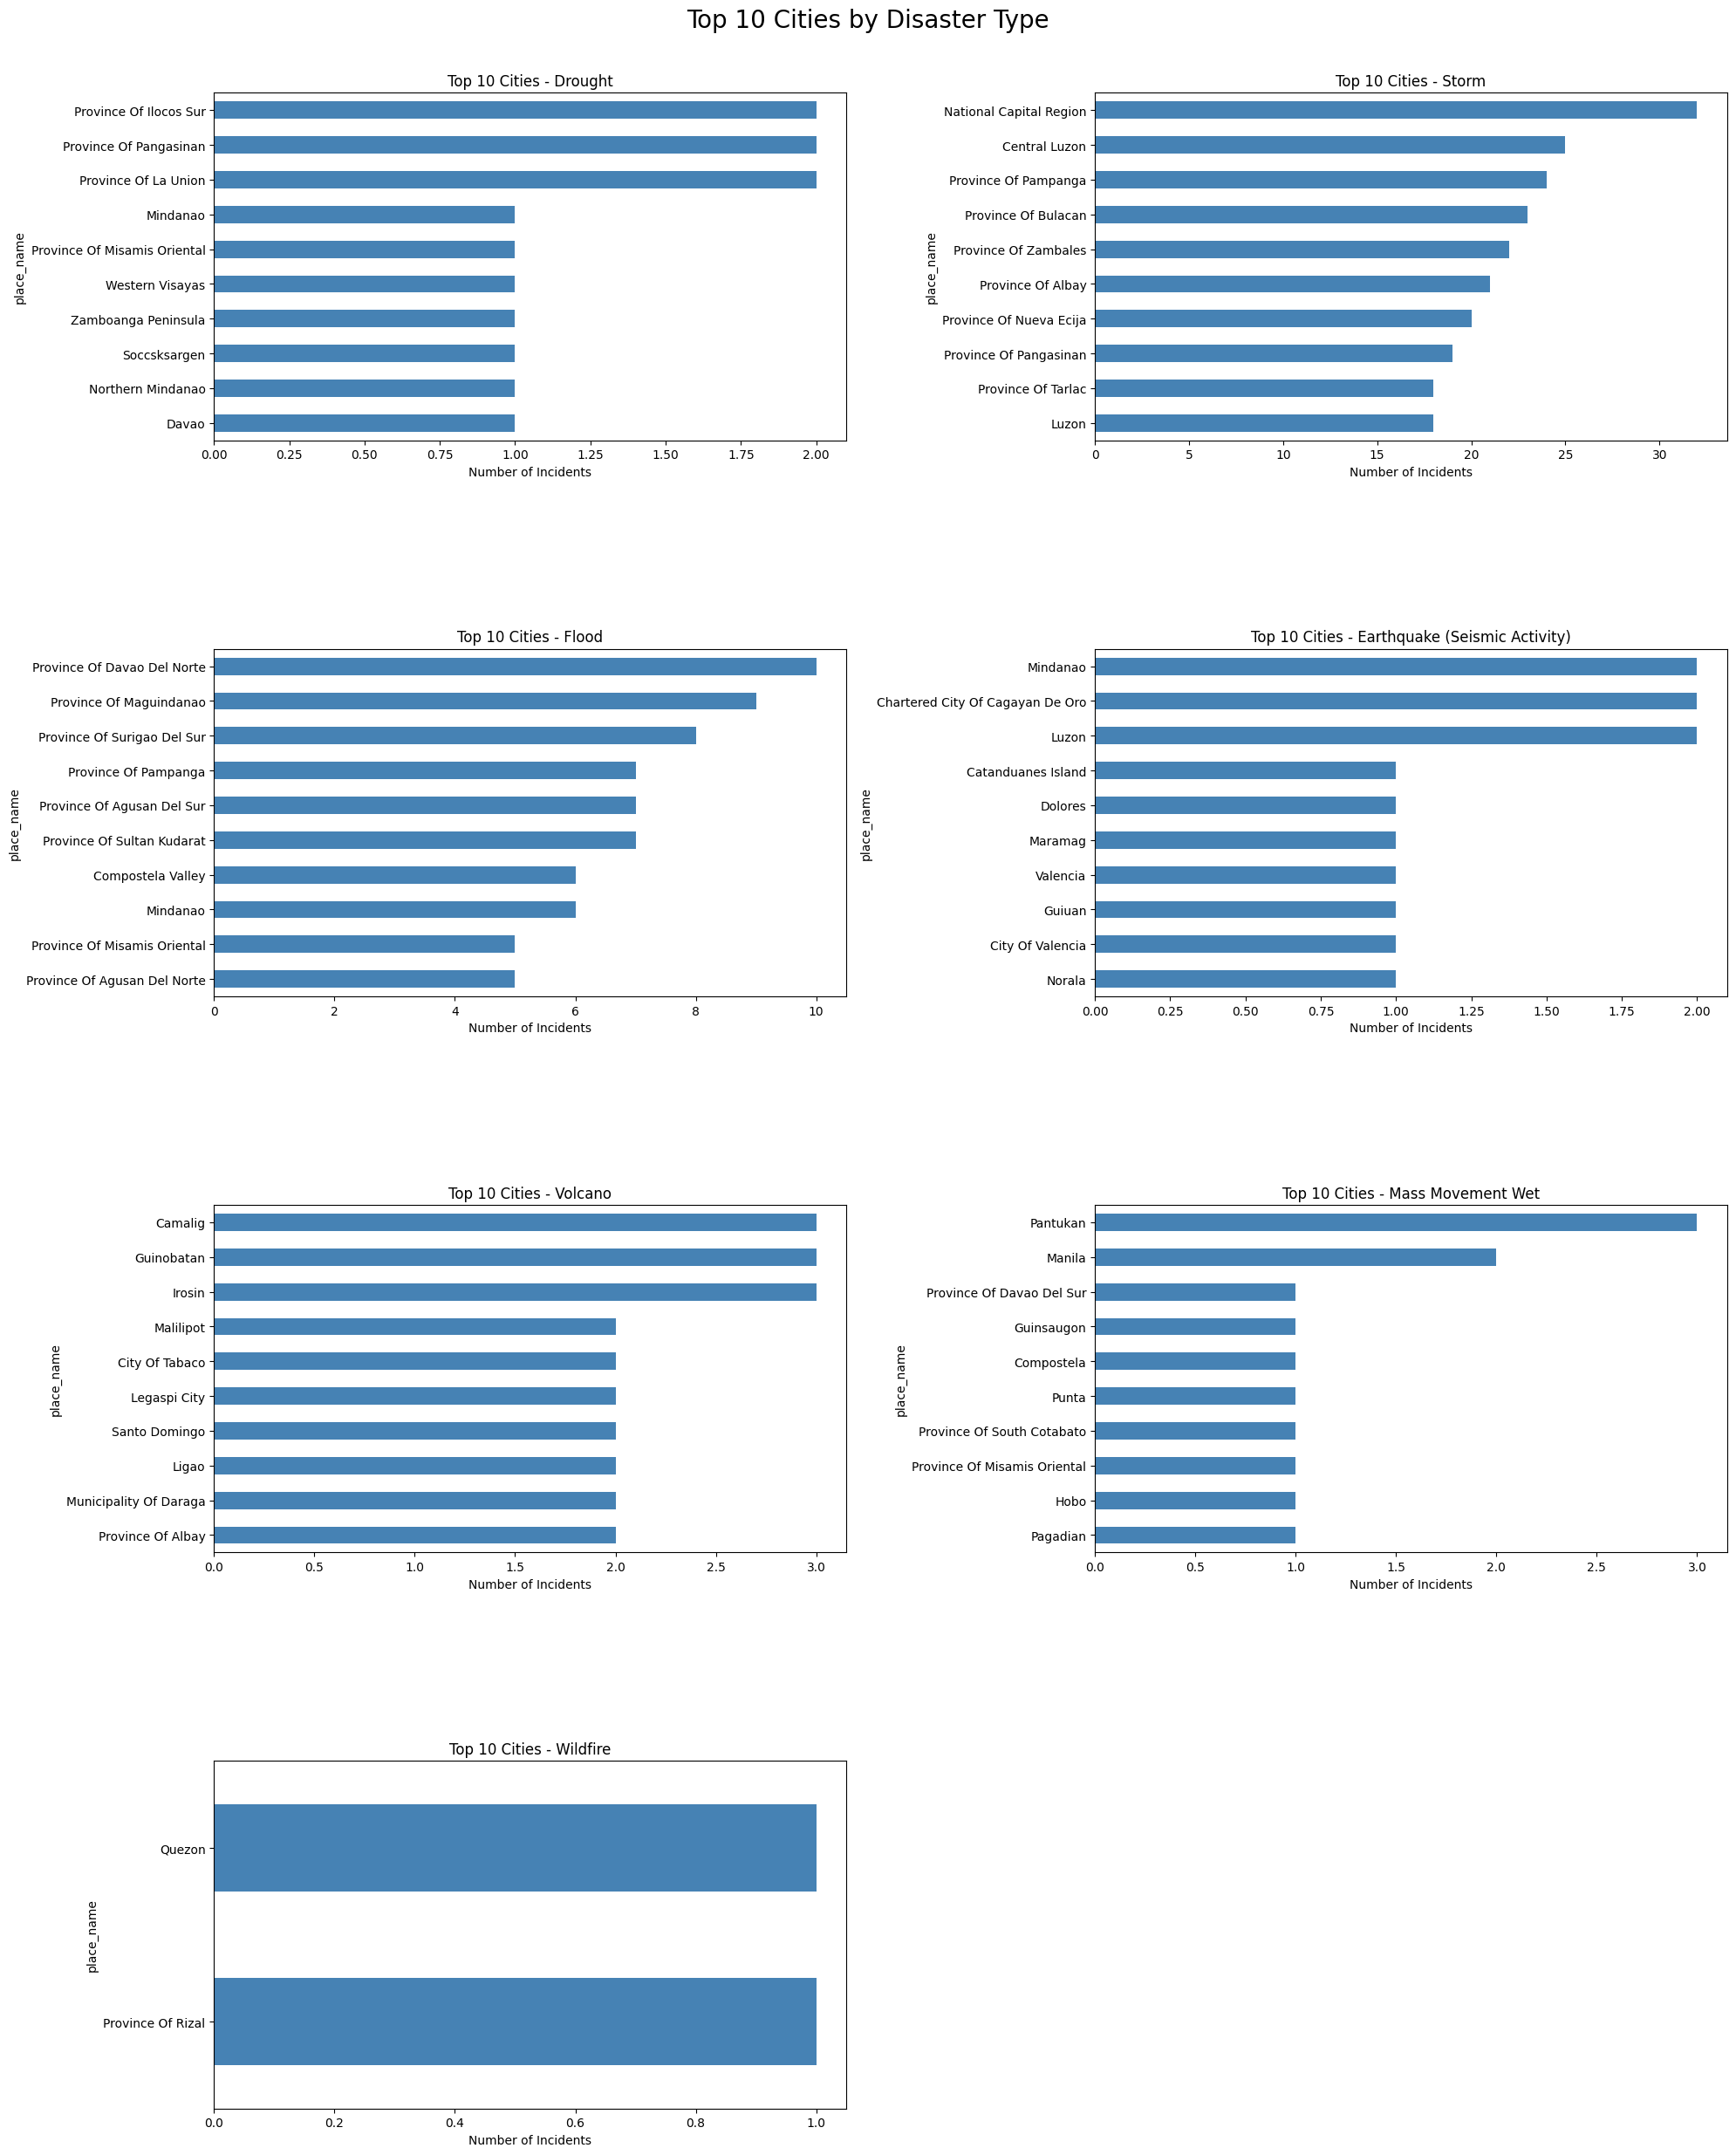

In [14]:
target_disasters = [
    'drought', 'storm', 'flood',
    'earthquake (seismic activity)', 'volcano', 'mass movement wet',
    'wildfire'
]

# Clean disaster type and place_name columns
disaster_df['disaster_type'] = disaster_df['disaster_type'].str.strip().str.lower()
disaster_df['place_name'] = disaster_df['place_name'].str.strip().str.title()  # Keep titles for display

# Set up plots
plt.figure(figsize=(20, 30))
num_plots = len(target_disasters)

for i, dtype in enumerate(target_disasters, 1):
    # Filter by disaster type (now lowercase)
    subset = disaster_df[disaster_df['disaster_type'] == dtype]
    
    if subset.empty:
        continue  # Skip if no data for this type

    # Count top 10 cities
    city_counts = subset['place_name'].value_counts().head(10).sort_values(ascending=False)
    city_counts = city_counts[::-1]  # So most is on the left

    # Plot
    plt.subplot(5, 2, i)
    city_counts.plot(kind='barh', color='steelblue')
    plt.title(f'Top 10 Cities - {dtype.title()}')
    plt.xlabel('Number of Incidents')
    plt.tight_layout()

warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

plt.suptitle('Top 10 Cities by Disaster Type', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.6)
plt.show()

# Weather Insights

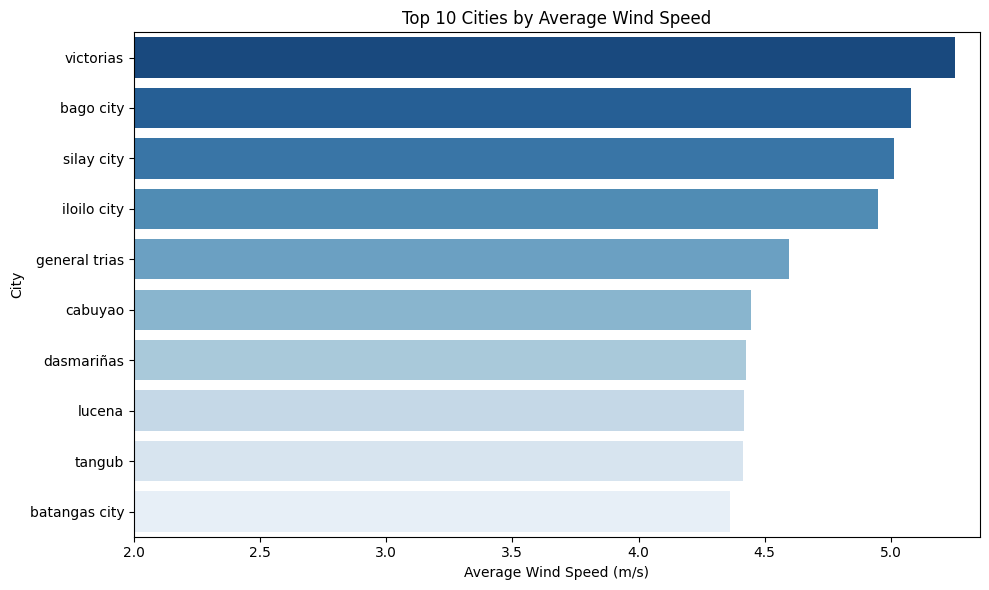

In [15]:
# Group by city and get the average wind speed
avg_wind = weather_df.groupby('city_name')['wind.speed'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_wind.values, y=avg_wind.index, palette='Blues_r')
plt.title('Top 10 Cities by Average Wind Speed')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('City')
plt.xlim(2, avg_wind.max()+0.1) 
plt.tight_layout()
plt.show()

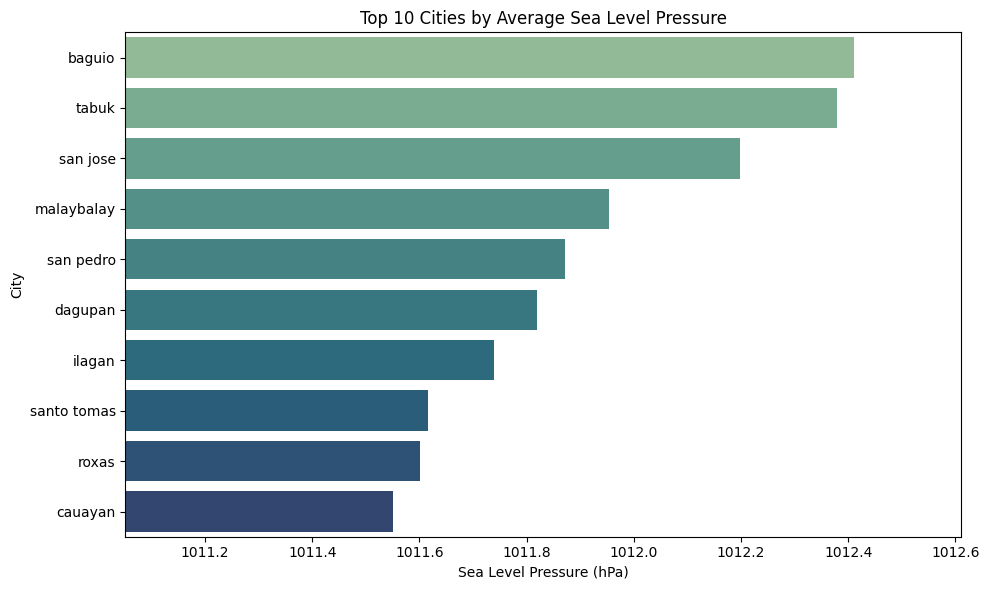

In [16]:
avg_sea = weather_df.groupby('city_name')['main.sea_level'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sea.values, y=avg_sea.index, palette='crest')
plt.title('Top 10 Cities by Average Sea Level Pressure')
plt.xlabel('Sea Level Pressure (hPa)')
plt.ylabel('City')
plt.xlim(avg_sea.min() - 0.5, avg_sea.max() + 0.2) 
plt.tight_layout()
plt.show()

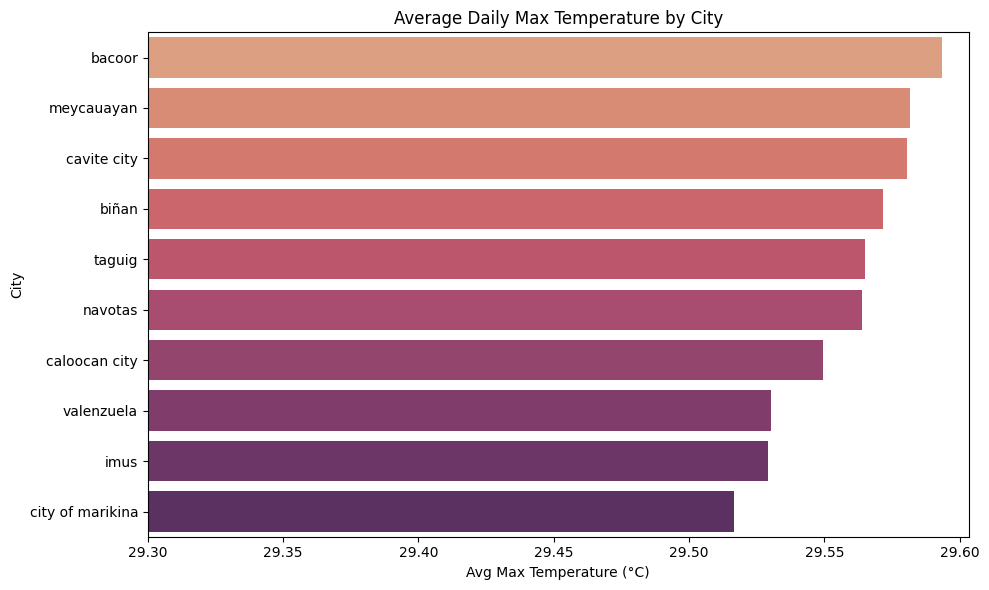

In [17]:
avg_temp_max = weather_df.groupby('city_name')['main.temp_max'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_temp_max.values, y=avg_temp_max.index, palette='flare')
plt.title('Average Daily Max Temperature by City')
plt.xlabel('Avg Max Temperature (°C)')
plt.ylabel('City')
plt.xlim(29.3, avg_temp_max.max()+0.01) 
plt.tight_layout()
plt.show()


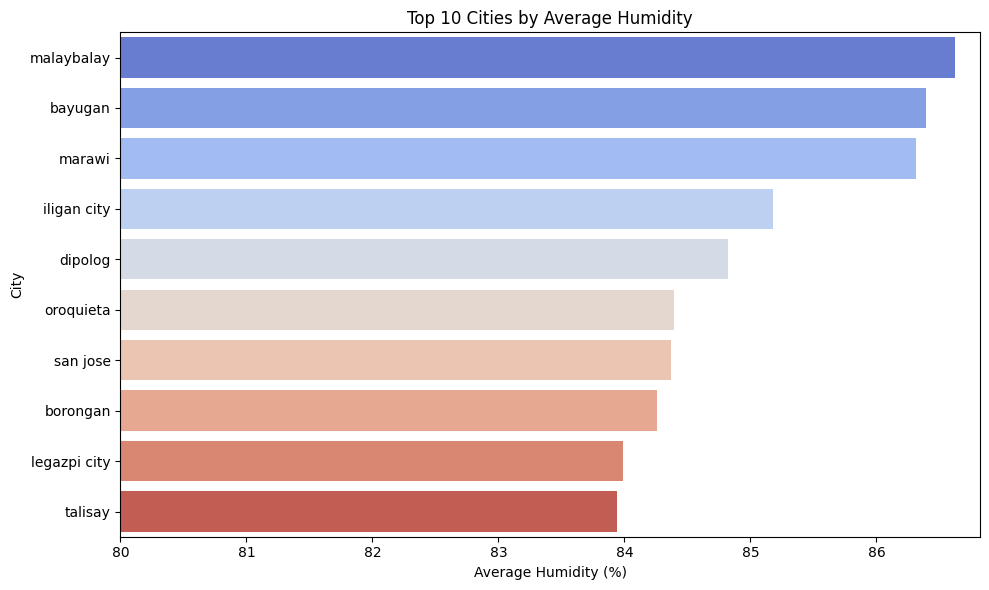

In [18]:
avg_humidity = weather_df.groupby('city_name')['main.humidity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_humidity.values, y=avg_humidity.index, palette='coolwarm')
plt.title('Top 10 Cities by Average Humidity')
plt.xlabel('Average Humidity (%)')
plt.ylabel('City')
plt.xlim(80,avg_humidity.max()+0.2) 
plt.tight_layout()
plt.show()